In [1]:
import pandas as pd
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import (
    leaguestandings,teamestimatedmetrics
)

In [2]:
def inspect_df(df):
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSample Rows:\n", df.sample(5))
    print("\nSummary Statistics:\n", df.describe())

In [3]:

# Load estimated metrics
data = teamestimatedmetrics.TeamEstimatedMetrics(season='2024-25')
df = data.get_data_frames()[0]

# Use correct column names based on API
df_team = df[['TEAM_NAME', 'GP', 'W', 'L', 'E_OFF_RATING', 'E_DEF_RATING', 'E_NET_RATING']]
df_team.columns = ['Team', 'Games Played', 'Wins', 'Losses', 'Off Rating', 'Def Rating', 'Net Rating']

# Sort by Net Rating
df_team = df_team.sort_values('Net Rating', ascending=False)

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

print(df_team.to_string(index=False))


                  Team  Games Played  Wins  Losses  Off Rating  Def Rating  Net Rating
 Oklahoma City Thunder            82    68      14       117.3       104.7        12.6
   Cleveland Cavaliers            82    64      18       119.1       109.0        10.1
        Boston Celtics            82    61      21       117.5       108.0         9.6
Minnesota Timberwolves            82    49      33       113.6       108.6         5.0
           LA Clippers            82    50      32       112.4       107.9         4.5
     Memphis Grizzlies            82    48      34       114.4       110.0         4.4
        Denver Nuggets            82    50      32       117.2       113.1         4.1
       Houston Rockets            82    52      30       111.4       108.0         3.4
       New York Knicks            82    51      31       115.0       111.8         3.2
 Golden State Warriors            82    48      34       112.0       108.9         3.1
        Indiana Pacers            82    50 

In [4]:
inspect_df(df_team)

Shape: (30, 7)

Data Types:
 Team             object
Games Played      int64
Wins              int64
Losses            int64
Off Rating      float64
Def Rating      float64
Net Rating      float64
dtype: object

Missing Values:
 Team            0
Games Played    0
Wins            0
Losses          0
Off Rating      0
Def Rating      0
Net Rating      0
dtype: int64

Sample Rows:
                   Team  Games Played  Wins  Losses  Off Rating  Def Rating  Net Rating
10      Indiana Pacers            82    50      32       114.1       111.3         2.8
21  Philadelphia 76ers            82    24      58       109.0       115.2        -6.1
24        Phoenix Suns            82    36      46       113.7       116.2        -2.5
6      Detroit Pistons            82    44      38       112.0       110.1         1.9
26       Brooklyn Nets            82    26      56       105.7       112.8        -7.1

Summary Statistics:
        Games Played       Wins     Losses  Off Rating  Def Rating  Net Ra

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2024–25 NBA Teams by Net Rating

The bar plot above ranks all NBA teams based on their **Net Rating** for the 2024–25 regular season.  
**Net Rating** measures the difference between a team's Offensive Rating and Defensive Rating, indicating overall team strength.

Key observations:
- **Oklahoma City Thunder** leads the league with the highest Net Rating, followed closely by the **Cleveland Cavaliers** and **Boston Celtics**.
- Positive Net Ratings (bars extending to the right) generally signify playoff-contending teams.
- Teams like the **Washington Wizards**, **Charlotte Hornets**, and **Utah Jazz** have the lowest Net Ratings, suggesting poor overall performance.
- A clear divide appears between positive and negative teams, with most playoff hopefuls clustered in the positive range.
- The plot uses a blue-red color scheme to visually emphasize high (blue) versus low (red) Net Ratings.

This visualization helps quickly identify which teams are statistical outliers — both strong and weak — heading into the playoffs.


C:\Users\matth\AppData\Local\Temp\ipykernel_5072\3330146803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


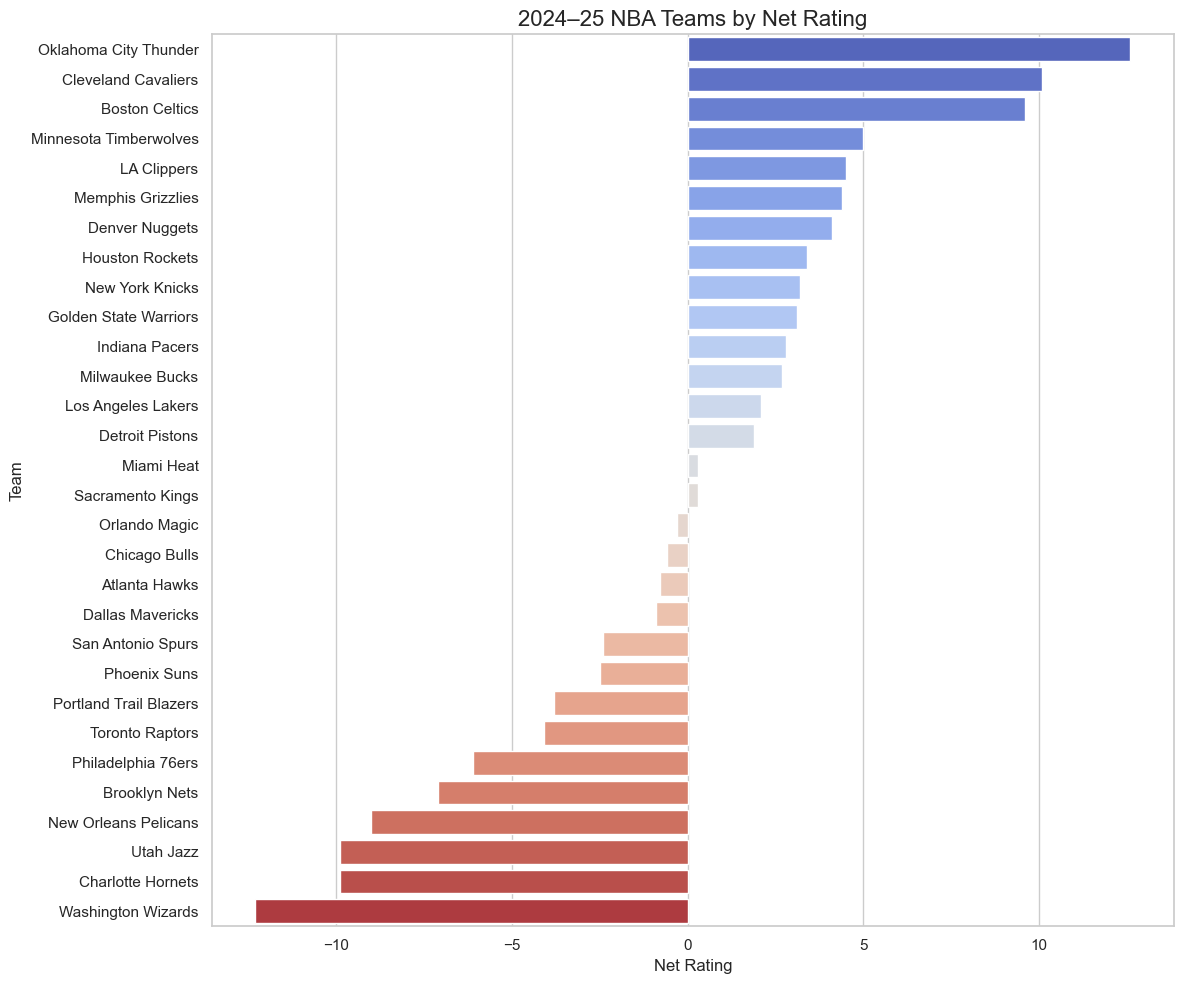

In [6]:

# Set seaborn style
sns.set(style="whitegrid")

# Plot Net Rating by Team
plt.figure(figsize=(12, 10))
sns.barplot(
    data=df_team.sort_values('Net Rating', ascending=False),
    x='Net Rating',
    y='Team',
    palette='coolwarm'
)
plt.title('2024–25 NBA Teams by Net Rating', fontsize=16)
plt.xlabel('Net Rating')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


In [7]:
url_ratings = "https://www.basketball-reference.com/leagues/NBA_2025_ratings.html"
tables = pd.read_html(url_ratings)

team_ratings = tables[0]

### Cleaning and Preparing Team Ratings Data

This section processes the raw team ratings table to extract relevant performance metrics for each NBA team in the 2024–25 season.

**Steps performed:**

1. **Flatten MultiIndex Columns (if present):**
   - Some tables from Basketball Reference have multi-level headers.
   - The code flattens these headers to a single level for easier manipulation.

2. **Select Key Columns:**
   - Retain only essential columns:
     - `Team` (team name)
     - `W` (wins)
     - `L` (losses)
     - `MOV` (Margin of Victory)
     - `ORtg` (Offensive Rating)
     - `DRtg` (Defensive Rating)
     - `NRtg` (Net Rating)

3. **Clean Team Names:**
   - Remove any asterisks (`*`) from team names, which usually denote playoff qualification on Basketball Reference.

**Summary of Output:**
- Displays team-level performance metrics.
- Teams like the **Oklahoma City Thunder**, **Cleveland Cavaliers**, and **Boston Celtics** have strong MOV, ORtg, and NRtg, reflecting dominant regular-season performances.
- Lower-performing teams like the **Utah Jazz**, **New Orleans Pelicans**, and **Charlotte Hornets** exhibit poor Net Ratings and margins.

This cleaned ratings dataset is essential for modeling playoff outcomes, as historical data shows that metrics like Net Rating and Margin of Victory are highly predictive of playoff success.


In [8]:
# Safely flatten columns
if isinstance(team_ratings.columns, pd.MultiIndex):
    team_ratings.columns = [col[1] if col[1] != '' else col[0] for col in team_ratings.columns]

# Keep only relevant columns
team_ratings = team_ratings[['Team', 'W', 'L', 'MOV', 'ORtg', 'DRtg', 'NRtg']]

# Remove any * from team names
team_ratings['Team'] = team_ratings['Team'].str.replace(r'[\*]', '', regex=True).str.strip()

print(team_ratings)


                      Team   W   L    MOV    ORtg    DRtg   NRtg
0    Oklahoma City Thunder  68  14  12.87  120.33  107.61  12.72
1      Cleveland Cavaliers  64  18   9.54  121.88  112.34   9.54
2           Boston Celtics  61  21   9.11  120.83  111.32   9.51
3   Minnesota Timberwolves  49  33   5.00  116.72  111.53   5.19
4     Los Angeles Clippers  50  32   4.66  115.20  110.43   4.77
5          Houston Rockets  52  30   4.51  115.23  110.89   4.34
6        Memphis Grizzlies  48  34   4.85  117.83  113.11   4.72
7           Denver Nuggets  50  32   3.89  119.97  116.20   3.77
8          New York Knicks  51  31   4.10  118.42  114.34   4.09
9    Golden State Warriors  48  34   3.30  115.09  111.81   3.28
10         Milwaukee Bucks  48  34   2.48  115.99  113.52   2.47
11         Detroit Pistons  44  38   1.90  115.05  113.12   1.93
12          Indiana Pacers  50  32   2.23  116.67  114.36   2.30
13      Los Angeles Lakers  50  32   1.22  115.92  114.70   1.22
14        Sacramento King

C:\Users\matth\AppData\Local\Temp\ipykernel_5072\2847948504.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_ratings['Team'] = team_ratings['Team'].str.replace(r'[\*]', '', regex=True).str.strip()


In [9]:
inspect_df(team_ratings)

Shape: (30, 7)

Data Types:
 Team     object
W         int64
L         int64
MOV     float64
ORtg    float64
DRtg    float64
NRtg    float64
dtype: object

Missing Values:
 Team    0
W       0
L       0
MOV     0
ORtg    0
DRtg    0
NRtg    0
dtype: int64

Sample Rows:
                       Team   W   L   MOV    ORtg    DRtg  NRtg
10         Milwaukee Bucks  48  34  2.48  115.99  113.52  2.47
13      Los Angeles Lakers  50  32  1.22  115.92  114.70  1.22
20       San Antonio Spurs  34  48 -2.76  114.53  117.23 -2.71
3   Minnesota Timberwolves  49  33  5.00  116.72  111.53  5.19
11         Detroit Pistons  44  38  1.90  115.05  113.12  1.93

Summary Statistics:
                W          L           MOV        ORtg        DRtg       NRtg
count  30.000000  30.000000  3.000000e+01   30.000000   30.000000  30.000000
mean   41.000000  41.000000 -1.776357e-16  114.618667  114.618667  -0.000333
std    13.354581  13.354581  5.994695e+00    3.879998    3.171603   6.025865
min    17.000000  14.

### Loading and Preparing Advanced Player Statistics

In this section, we collect and preprocess NBA player performance data for the 2024–25 season from Basketball Reference.

Steps performed:

1. **Load Advanced Statistics:**
   - Scrape the NBA 2025 advanced stats table using `pandas.read_html`.
   - Remove header rows accidentally read as data.
   - Keep key columns: `Player`, `Position`, `Age`, `Team`, `PER` (Player Efficiency Rating), `BPM` (Box Plus-Minus), and `VORP` (Value Over Replacement Player).
   - Convert `PER`, `BPM`, and `VORP` columns to numeric types.

2. **Load Total Statistics:**
   - Scrape the NBA 2025 totals stats table.
   - Focus on retrieving the `Minutes Played (MP)` for each player.
   - Ensure players who played for multiple teams are counted only once using their aggregated "TOT" (Total) row.

3. **Merge and Clean Data:**
   - Merge the advanced stats and total minutes datasets on `Player` and `Team`.
   - Filter out players who played fewer than **1000 minutes** to focus on high-impact players.

The resulting `df_combined_filtered` DataFrame contains detailed performance metrics for players with significant playing time, and it will serve as a foundation for further team-level feature engineering.


In [10]:

# Load advanced stats
url_advanced = 'https://www.basketball-reference.com/leagues/NBA_2025_advanced.html'
df_advanced = pd.read_html(url_advanced)[0]
df_advanced = df_advanced[df_advanced['Player'] != 'Player']
df_advanced = df_advanced.rename(columns={'Tm': 'Team'})

# Keep relevant columns
advanced_cols = ['Player', 'Pos', 'Age', 'Team', 'PER', 'BPM', 'VORP']
df_advanced[["PER", "BPM", "VORP"]] = df_advanced[["PER", "BPM", "VORP"]].apply(pd.to_numeric, errors='coerce')
df_advanced_clean = df_advanced[advanced_cols]

# Load total stats to get minutes played
url_totals = 'https://www.basketball-reference.com/leagues/NBA_2025_totals.html'
df_totals = pd.read_html(url_totals)[0]
df_totals = df_totals[df_totals['Player'] != 'Player']
df_totals = df_totals.rename(columns={'Tm': 'Team'})
df_totals["MP"] = pd.to_numeric(df_totals["MP"], errors='coerce')
df_minutes = df_totals[['Player', 'Team', 'MP']]

# Handle players who played for multiple teams (keep only 'TOT' row)
players_with_2tm = df_minutes[df_minutes['Team'] == '2TM']['Player'].unique()
df_minutes = df_minutes[~((df_minutes['Player'].isin(players_with_2tm)) & (df_minutes['Team'] != '2TM'))]
df_minutes['Team'] = df_minutes['Team'].replace('2TM', 'TOT')

# Merge advanced stats with minutes
df_combined = pd.merge(df_advanced_clean, df_minutes, on=['Player', 'Team'], how='inner')

# Filter out players with very low minutes (e.g., < 500 MP)
df_combined_filtered = df_combined[df_combined['MP'] >= 1000]

df_combined_filtered.head()


,Player,Pos,Age,Team,PER,BPM,VORP,MP
0,Mikal Bridges,SF,28.0,NYK,14.0,-0.5,1.2,3036.0
1,Josh Hart,SG,29.0,NYK,16.5,2.8,3.6,2897.0
2,Anthony Edwards,SG,23.0,MIN,20.1,4.3,4.6,2871.0
3,Devin Booker,SG,28.0,PHO,19.3,0.4,1.7,2795.0
4,James Harden,PG,35.0,LAC,20.0,4.3,4.4,2789.0


In [11]:
inspect_df(df_combined_filtered)

Shape: (241, 8)

Data Types:
 Player     object
Pos        object
Age       float64
Team       object
PER       float64
BPM       float64
VORP      float64
MP        float64
dtype: object

Missing Values:
 Player    0
Pos       0
Age       0
Team      0
PER       0
BPM       0
VORP      0
MP        0
dtype: int64

Sample Rows:
                  Player Pos   Age Team   PER  BPM  VORP      MP
150  Isaiah Hartenstein   C  26.0  OKC  18.9  3.2   2.1  1590.0
104          Josh Green  SG  24.0  CHO   7.8 -4.3  -1.1  1887.0
198           Max Strus  SF  28.0  CLE  12.6  1.3   1.1  1273.0
240         Alex Caruso  SG  30.0  OKC  15.9  4.0   1.6  1041.0
232      Jonathan Isaac  PF  27.0  ORL  16.6  0.7   0.7  1090.0

Summary Statistics:
               Age         PER         BPM        VORP           MP
count  241.000000  241.000000  241.000000  241.000000   241.000000
mean    26.004149   15.138174    0.166805    1.119917  1801.556017
std      4.344055    4.260110    2.841196    1.561095   493.781

### Top 15 NBA Players by Player Efficiency Rating (PER)

This visualization shows the top 15 NBA players during the 2024–25 season based on **Player Efficiency Rating (PER)** — an all-in-one advanced metric that measures a player's per-minute performance.

**Steps performed:**
- The dataset was filtered to players with over 1000 minutes played to ensure a meaningful sample.
- Players were then sorted by **PER** in descending order, and the top 15 were selected.

**Key Observations:**
- **Nikola Jokić**, **Shai Gilgeous-Alexander**, and **Giannis Antetokounmpo** lead the league in PER, reflecting their dominant on-court impact.
- Rising stars like **Victor Wembanyama** and **Mark Williams** also rank highly, showing strong early-career performances.
- The top 15 includes a mix of MVP candidates, elite role players, and All-Star level contributors from a wide spread of NBA teams.

**Summary of Plot:**
- Each bar represents a player's PER, with color indicating the player's team.
- The plot highlights which players are the most efficient and impactful contributors on a per-minute basis.

PER is often used to identify MVP-caliber players, and many of the names shown here are cornerstones of their respective teams' success.


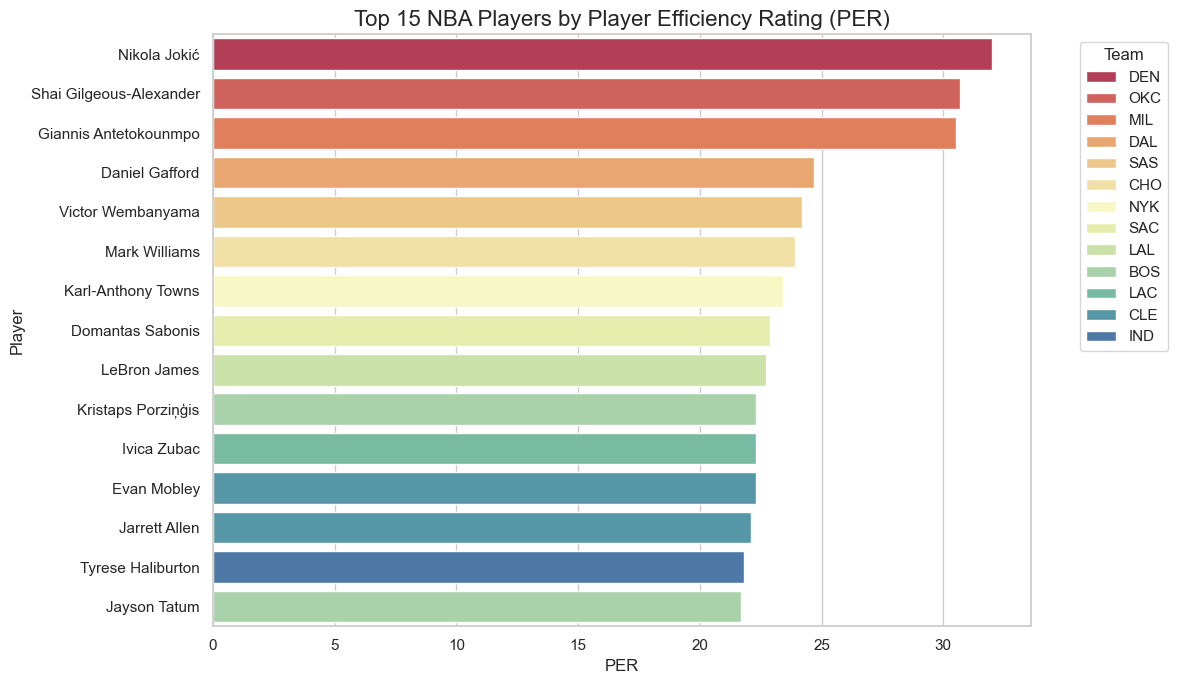

In [12]:

# Sort and select Top 15 players by PER
top15_per = df_combined_filtered.sort_values('PER', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=top15_per, x='PER', y='Player', hue='Team', dodge=False, palette='Spectral')
plt.title('Top 15 NBA Players by Player Efficiency Rating (PER)', fontsize=16)
plt.xlabel('PER')
plt.ylabel('Player')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Loading and Cleaning Per-Game Player Statistics

This code block loads and processes basic per-game player statistics for the 2024–25 NBA season from Basketball Reference.

Steps performed:

1. **Load Per-Game Statistics:**
   - Scrape the NBA 2025 per-game stats table using `pandas.read_html`.
   - Remove duplicate header rows that appear in the dataset.

2. **Clean and Prepare Data:**
   - Rename the `Tm` column to `Team` for clarity.
   - Convert important statistical columns (`PTS`, `AST`, `TRB`, `FG%`, `3P%`, `STL`, `BLK`) to numeric types, allowing for quantitative analysis.

3. **Rename Columns for Simplicity:**
   - Points per game (`PTS`) → `PPG`
   - Assists per game (`AST`) → `APG`
   - Rebounds per game (`TRB`) → `RPG`
   - Steals per game (`STL`) → `SPG`
   - Blocks per game (`BLK`) → `BPG`

4. **Select Key Columns:**
   - Focus only on essential features like `Player`, `Age`, `Team`, `Position`, and core per-game stats.

5. **Handle Players with Multiple Teams:**
   - For players who played on multiple teams, retain only their combined "TOT" statistics to avoid duplication.

The cleaned `df_basic` DataFrame is now ready for further player-level analysis or feature engineering in the predictive modeling process.


In [13]:

# Load per-game player stats from Basketball Reference (2025 season)
url = 'https://www.basketball-reference.com/leagues/NBA_2025_per_game.html'

# Read the table
tables = pd.read_html(url)
df_per_game = tables[0]

# Remove duplicate header rows
df_per_game = df_per_game[df_per_game['Player'] != 'Player']

# Rename team column first (in case it's 'Tm' not 'Team')
df_per_game = df_per_game.rename(columns={'Tm': 'Team'})

# Convert relevant numeric columns to float
cols_to_numeric = ['PTS', 'AST', 'TRB', 'FG%', '3P%', 'STL', 'BLK']
df_per_game[cols_to_numeric] = df_per_game[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# Rename for clarity 
df_per_game = df_per_game.rename(columns={
    'PTS': 'PPG',
    'AST': 'APG',
    'TRB': 'RPG',
    'STL': 'SPG',
    'BLK': 'BPG'
})

# Select useful columns
df_basic = df_per_game[['Player', 'Age', 'Team', 'Pos', 'PPG', 'APG', 'RPG', 'FG%', '3P%', 'SPG', 'BPG']]

# Handle players on multiple teams
players_with_2tm = df_basic[df_basic['Team'] == '2TM']['Player'].unique()
df_basic = df_basic[~((df_basic['Player'].isin(players_with_2tm)) & (df_basic['Team'] != '2TM'))]

#Rename '2TM' to 'TOT' or keep it
df_basic['Team'] = df_basic['Team'].replace('2TM', 'TOT')

print(df_basic.head())


                    Player   Age Team Pos   PPG   APG   RPG    FG%    3P%  SPG  BPG
0  Shai Gilgeous-Alexander  26.0  OKC  PG  32.7   6.4   5.0  0.519  0.375  1.7  1.0
1    Giannis Antetokounmpo  30.0  MIL  PF  30.4   6.5  11.9  0.601  0.222  0.9  1.2
2             Nikola Jokić  29.0  DEN   C  29.6  10.2  12.7  0.576  0.417  1.8  0.6
3              Luka Dončić  25.0  TOT  PG  28.2   7.7   8.2  0.450  0.368  1.8  0.4
6          Anthony Edwards  23.0  MIN  SG  27.6   4.5   5.7  0.447  0.395  1.2  0.6


In [14]:
inspect_df(df_basic)

Shape: (582, 11)

Data Types:
 Player     object
Age       float64
Team       object
Pos        object
PPG       float64
APG       float64
RPG       float64
FG%       float64
3P%       float64
SPG       float64
BPG       float64
dtype: object

Missing Values:
 Player     0
Age        1
Team       1
Pos        1
PPG        1
APG        1
RPG        1
FG%        3
3P%       28
SPG        1
BPG        1
dtype: int64

Sample Rows:
              Player   Age Team Pos   PPG  APG  RPG    FG%    3P%  SPG  BPG
691  Leonard Miller  21.0  MIN  SF   1.5  0.0  0.8  0.400  0.000  0.2  0.1
689  Jazian Gortman  21.0  DAL  PG   1.5  0.4  0.3  0.391  0.364  0.1  0.1
567    Devin Carter  22.0  SAC  PG   3.8  1.1  2.1  0.370  0.295  0.6  0.1
577         JT Thor  22.0  TOT  PF   3.6  0.3  2.4  0.424  0.286  0.4  0.5
210   Jose Alvarado  26.0  NOP  PG  10.3  4.6  2.4  0.392  0.359  1.3  0.3

Summary Statistics:
               Age         PPG         APG         RPG         FG%         3P%         SPG       

In [15]:
df_merged = pd.merge(
    df_basic,
    df_advanced_clean,
    on=['Player', 'Age', 'Team'],
    how='inner'
)
df_merged = df_merged.drop(columns=['Pos_y']) 
df_merged = df_merged.rename(columns={'Pos_x': 'Pos'})

print(df_merged.head())


                    Player   Age Team Pos   PPG   APG   RPG    FG%    3P%  SPG  BPG   PER   BPM  VORP
0  Shai Gilgeous-Alexander  26.0  OKC  PG  32.7   6.4   5.0  0.519  0.375  1.7  1.0  30.7  11.5   8.9
1    Giannis Antetokounmpo  30.0  MIL  PF  30.4   6.5  11.9  0.601  0.222  0.9  1.2  30.5   9.5   6.6
2             Nikola Jokić  29.0  DEN   C  29.6  10.2  12.7  0.576  0.417  1.8  0.6  32.0  13.3   9.8
3          Anthony Edwards  23.0  MIN  SG  27.6   4.5   5.7  0.447  0.395  1.2  0.6  20.1   4.3   4.6
4             Jayson Tatum  26.0  BOS  PF  26.8   6.0   8.7  0.452  0.343  1.1  0.5  21.7   5.2   4.8


In [16]:
inspect_df(df_merged)

Shape: (505, 14)

Data Types:
 Player     object
Age       float64
Team       object
Pos        object
PPG       float64
APG       float64
RPG       float64
FG%       float64
3P%       float64
SPG       float64
BPG       float64
PER       float64
BPM       float64
VORP      float64
dtype: object

Missing Values:
 Player     0
Age        1
Team       1
Pos        1
PPG        1
APG        1
RPG        1
FG%        3
3P%       23
SPG        1
BPG        1
PER        1
BPM        1
VORP       1
dtype: int64

Sample Rows:
                 Player   Age Team Pos   PPG  APG  RPG    FG%    3P%  SPG  BPG   PER  BPM  VORP
41        Jordan Poole  25.0  WAS  SG  20.5  4.5  3.0  0.432  0.378  1.3  0.4  16.6  0.4   1.2
412        P.J. Tucker  39.0  NYK  SF   3.0  0.0  2.7  0.429  0.500  0.3  0.3   5.5 -7.2  -0.1
486         Joe Ingles  37.0  MIN  SF   0.8  1.2  0.6  0.261  0.200  0.1  0.0   2.4 -7.0  -0.1
131     Daniel Gafford  26.0  DAL   C  12.3  1.4  6.8  0.702    NaN  0.4  1.8  24.7  3.8   1.8


In [17]:
# Get playoff seed info from NBA standings
standings = leaguestandings.LeagueStandings(season='2024-25').get_data_frames()[0]
playoff_seeds = standings[['TeamID', 'TeamCity', 'TeamName', 'Conference', 'PlayoffRank']]
playoff_seeds = playoff_seeds.rename(columns={'TeamID': 'team_id'})
playoff_seeds['Team'] = playoff_seeds['TeamCity'] + " " + playoff_seeds['TeamName']
playoff_seeds = playoff_seeds[['Team', 'Conference', 'PlayoffRank']]
playoff_seeds


,Team,Conference,PlayoffRank
0,Oklahoma City Thunder,West,1
1,Cleveland Cavaliers,East,1
2,Boston Celtics,East,2
3,Houston Rockets,West,2
4,New York Knicks,East,3
5,Los Angeles Lakers,West,3
6,Denver Nuggets,West,4
7,Indiana Pacers,East,4
8,LA Clippers,West,5
9,Milwaukee Bucks,East,5


In [18]:
inspect_df(playoff_seeds)

Shape: (30, 3)

Data Types:
 Team           object
Conference     object
PlayoffRank     int64
dtype: object

Missing Values:
 Team           0
Conference     0
PlayoffRank    0
dtype: int64

Sample Rows:
                       Team Conference  PlayoffRank
3          Houston Rockets       West            2
10  Minnesota Timberwolves       West            6
14       Memphis Grizzlies       West            8
8              LA Clippers       West            5
29               Utah Jazz       West           15

Summary Statistics:
        PlayoffRank
count    30.000000
mean      8.000000
std       4.394354
min       1.000000
25%       4.250000
50%       8.000000
75%      11.750000
max      15.000000


### Clutch Performance Statistics: Last 5 Minutes (2024–25 Season)

In this section, we collect clutch performance data for all NBA teams during the 2024–25 regular season using the NBA API.

**Steps performed:**
1. **Load Clutch Data:**
   - Using the `LeagueDashTeamClutch` endpoint from `nba_api`, we pull team-level stats specifically for **clutch time** (defined as the last 5 minutes of a game with the score within 5 points).

2. **Select Key Metrics:**
   - `ClutchNetRating`: Team plus-minus during clutch situations.
   - `W_PCT`: Win percentage during clutch games.
   - `MIN`: Total minutes played in clutch situations.

3. **Rename Columns:**
   - Standardize column names for consistency with the rest of the project.


In [19]:
# Clutch stats (last 5 minutes, score within 5)
from nba_api.stats.endpoints import leaguedashteamclutch

clutch = leaguedashteamclutch.LeagueDashTeamClutch(
    clutch_time='Last 5 Minutes',
    measure_type_detailed_defense='Base',
    season='2024-25',
    season_type_all_star='Regular Season'
).get_data_frames()[0]

# Select relevant clutch performance columns
clutch = clutch[['TEAM_NAME', 'PLUS_MINUS', 'W_PCT', 'MIN']]
clutch = clutch.rename(columns={
    'TEAM_NAME': 'Team',
    'PLUS_MINUS': 'ClutchNetRating'
})

clutch


,Team,ClutchNetRating,W_PCT,MIN
0,Atlanta Hawks,29.0,0.512,160.035000
1,Boston Celtics,59.0,0.686,138.858333
2,Brooklyn Nets,-49.0,0.447,145.363333
3,Charlotte Hornets,-37.0,0.368,152.133333
4,Chicago Bulls,21.0,0.500,118.203333
5,Cleveland Cavaliers,66.0,0.684,135.100000
6,Dallas Mavericks,20.0,0.500,141.963333
7,Denver Nuggets,51.0,0.568,146.325000
8,Detroit Pistons,-46.0,0.477,150.260000
9,Golden State Warriors,20.0,0.556,145.393333


**Summary of Output:**
- The **Cleveland Cavaliers** lead all teams with a ClutchNetRating of +66.0 and a strong win percentage of 0.684.
- Teams like the **Indiana Pacers** (+72.0) and **Boston Celtics** (+59.0) also perform exceptionally well in close games.
- Struggling teams in clutch scenarios include the **Utah Jazz** (-81.0) and **Miami Heat** (-61.0), despite playing significant clutch minutes.

This clutch-time performance data will be used as an important feature when predicting playoff success, as strong late-game performance is often crucial for championship contenders.

In [20]:
inspect_df(clutch)

Shape: (30, 4)

Data Types:
 Team                object
ClutchNetRating    float64
W_PCT              float64
MIN                float64
dtype: object

Missing Values:
 Team               0
ClutchNetRating    0
W_PCT              0
MIN                0
dtype: int64

Sample Rows:
                   Team  ClutchNetRating  W_PCT         MIN
27     Toronto Raptors            -62.0  0.313  127.448333
22  Philadelphia 76ers            -43.0  0.417  133.345000
25    Sacramento Kings             16.0  0.452  179.331667
4        Chicago Bulls             21.0  0.500  118.203333
26   San Antonio Spurs             -9.0  0.459  138.385000

Summary Statistics:
        ClutchNetRating      W_PCT         MIN
count        30.000000  30.000000   30.000000
mean          0.000000   0.500300  140.517333
std          41.125544   0.107801   25.661899
min         -81.000000   0.242000   66.400000
25%         -34.500000   0.447250  130.273750
50%          12.500000   0.506000  139.750000
75%          25.50000

In [21]:
team_abbr = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BRK',
    'Charlotte Hornets': 'CHO',
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'LA Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP',
    'New York Knicks': 'NYK',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHO',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Washington Wizards': 'WAS'
}

clutch['TeamAbbr'] = clutch['Team'].map(team_abbr)


In [22]:
team_abbr_to_name = {
    'ATL': 'Atlanta Hawks',
    'BOS': 'Boston Celtics',
    'BRK': 'Brooklyn Nets',
    'CHI': 'Chicago Bulls',
    'CHO': 'Charlotte Hornets',
    'CLE': 'Cleveland Cavaliers',
    'DAL': 'Dallas Mavericks',
    'DEN': 'Denver Nuggets',
    'DET': 'Detroit Pistons',
    'GSW': 'Golden State Warriors',
    'HOU': 'Houston Rockets',
    'IND': 'Indiana Pacers',
    'LAC': 'Los Angeles Clippers',
    'LAL': 'Los Angeles Lakers',
    'MEM': 'Memphis Grizzlies',
    'MIA': 'Miami Heat',
    'MIL': 'Milwaukee Bucks',
    'MIN': 'Minnesota Timberwolves',
    'NOP': 'New Orleans Pelicans',
    'NYK': 'New York Knicks',
    'OKC': 'Oklahoma City Thunder',
    'ORL': 'Orlando Magic',
    'PHI': 'Philadelphia 76ers',
    'PHO': 'Phoenix Suns',
    'POR': 'Portland Trail Blazers',
    'SAC': 'Sacramento Kings',
    'SAS': 'San Antonio Spurs',
    'TOR': 'Toronto Raptors',
    'UTA': 'Utah Jazz',
    'WAS': 'Washington Wizards'
}


### Clutch Net Rating vs Clutch Win Percentage (2024–25 Season)

The scatter plot above compares each NBA team's **Clutch Net Rating** and **Clutch Win Percentage** during the 2024–25 regular season.

**Key takeaways:**
- Teams in the **top right quadrant** (e.g., **Boston Celtics**, **Cleveland Cavaliers**, **Indiana Pacers**) combine strong performance (high Net Rating) with a high win rate in clutch situations, indicating true late-game dominance.
- Teams like the **Oklahoma City Thunder** and **New York Knicks** also show efficient clutch play with strong win percentages.
- Teams in the **bottom left quadrant**, like the **Utah Jazz** and **Toronto Raptors**, struggle both in clutch scoring margins and in securing wins during close games.
- A few teams (e.g., **Phoenix Suns**, **Los Angeles Clippers**) have moderate clutch Net Ratings but manage respectable win rates, suggesting possible "clutch luck" or situational resilience.

**Plot Details:**
- X-axis: **Clutch Net Rating** (Plus-Minus per 100 possessions during clutch time).
- Y-axis: **Clutch Win Percentage** (Proportion of clutch games won).
- Teams are color-coded by franchise for easy identification.

This visualization helps identify teams that are not just winning close games, but doing so in a statistically dominant fashion — a crucial indicator of playoff success.


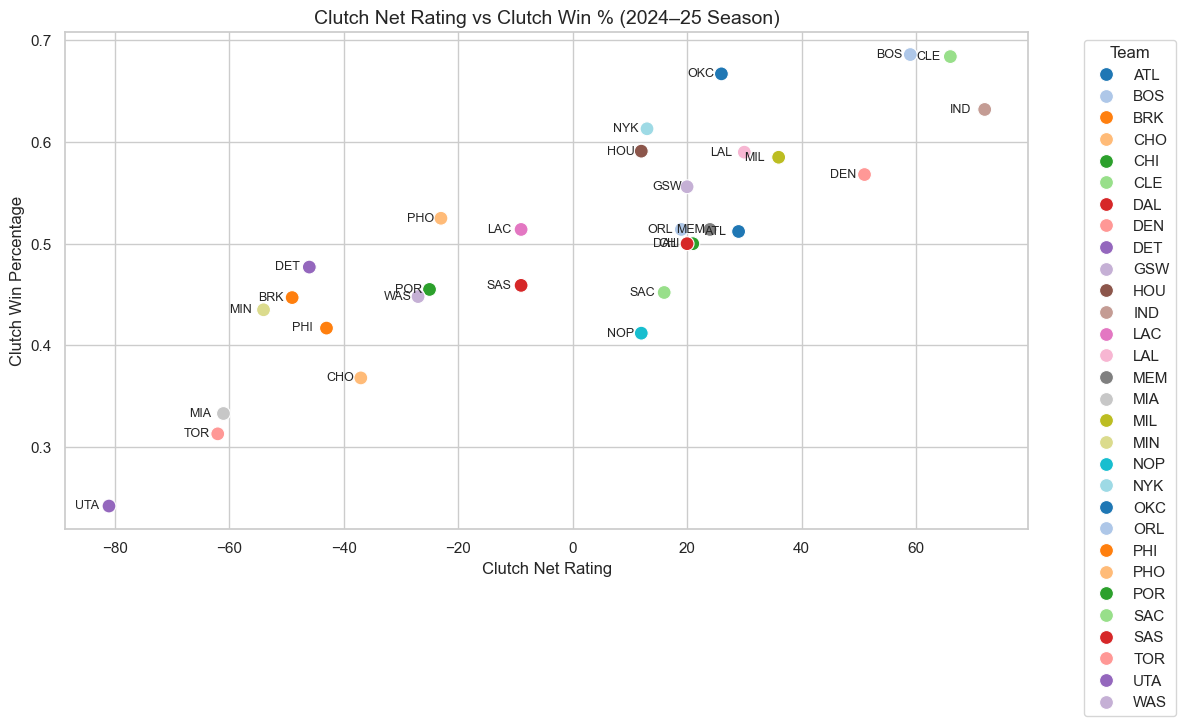

In [23]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=clutch,
    x='ClutchNetRating',
    y='W_PCT',
    hue='TeamAbbr',  
    s=100,
    palette='tab20',
    legend='full'
)

# Add initials as labels
for i, row in clutch.iterrows():
    plt.text(
        row['ClutchNetRating'] - 6,
        row['W_PCT'],
        row['TeamAbbr'],  
        fontsize=9,
        ha='left',
        va='center'
    )

plt.title('Clutch Net Rating vs Clutch Win % (2024–25 Season)', fontsize=14)
plt.xlabel('Clutch Net Rating')
plt.ylabel('Clutch Win Percentage')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Loading and Preparing Team SRS (Simple Rating System) Data

This section pulls **Simple Rating System (SRS)** scores for all NBA teams during the 2024–25 season from Basketball Reference.

**Steps performed:**
1. **Load All Tables:**
   - Scrape the NBA 2025 season page tables using `pandas.read_html`.

2. **Extract Conference Tables:**
   - Identify and extract the Eastern and Western Conference standings tables.
   - Rename the relevant columns (`Eastern Conference` and `Western Conference`) to a unified `Team` column.

3. **Combine and Clean Data:**
   - Concatenate both conferences into a single DataFrame.
   - Keep only the `Team` and `SRS` columns for analysis.


In [24]:
# Load all tables from Basketball Reference
url = "https://www.basketball-reference.com/leagues/NBA_2025.html"
tables = pd.read_html(url)

# Eastern Conference = first table with 'Eastern Conference' column
east_srs = [df for df in tables if 'Eastern Conference' in df.columns][0]
east_srs = east_srs.rename(columns={'Eastern Conference': 'Team'})

# Western Conference = first table with 'Western Conference' column
west_srs = [df for df in tables if 'Western Conference' in df.columns][0]
west_srs = west_srs.rename(columns={'Western Conference': 'Team'})

# Combine both
srs = pd.concat([east_srs, west_srs], ignore_index=True)

# Keep only relevant columns
srs = srs[['Team', 'SRS']]
print(srs)


                           Team    SRS
0      Cleveland Cavaliers* (1)   8.81
1           Boston Celtics* (2)   8.28
2          New York Knicks* (3)   3.59
3           Indiana Pacers* (4)   1.68
4          Milwaukee Bucks* (5)   2.12
5          Detroit Pistons* (6)   1.73
6            Orlando Magic* (7)  -0.70
7            Atlanta Hawks* (8)  -1.41
8            Chicago Bulls* (9)  -1.83
9              Miami Heat* (10)   0.11
10         Toronto Raptors (11)  -4.40
11           Brooklyn Nets (12)  -6.95
12      Philadelphia 76ers (13)  -6.29
13       Charlotte Hornets (14)  -9.10
14      Washington Wizards (15) -12.14
15   Oklahoma City Thunder* (1)  12.70
16         Houston Rockets* (2)   4.97
17      Los Angeles Lakers* (3)   1.45
18          Denver Nuggets* (4)   3.97
19    Los Angeles Clippers* (5)   4.84
20  Minnesota Timberwolves* (6)   5.15
21   Golden State Warriors* (7)   3.56
22       Memphis Grizzlies* (8)   4.79
23        Sacramento Kings* (9)   0.58
24       Dallas Mavericks

In [25]:
inspect_df(srs)

Shape: (30, 2)

Data Types:
 Team     object
SRS     float64
dtype: object

Missing Values:
 Team    0
SRS     0
dtype: int64

Sample Rows:
                           Team    SRS
12     Philadelphia 76ers (13)  -6.29
21  Golden State Warriors* (7)   3.56
14     Washington Wizards (15) -12.14
19   Los Angeles Clippers* (5)   4.84
28   New Orleans Pelicans (14)  -8.59

Summary Statistics:
                 SRS
count  3.000000e+01
mean  -5.921189e-17
std    5.779792e+00
min   -1.214000e+01
25%   -2.640000e+00
50%    3.450000e-01
75%    3.875000e+00
max    1.270000e+01


**Summary of Output:**
- **SRS** measures team strength by combining **average point differential** and **strength of schedule**.
- Top teams by SRS:
  - **Cleveland Cavaliers** (+8.81)
  - **Boston Celtics** (+8.28)
  - **New York Knicks** (+3.59)
- Teams with very low or negative SRS values, such as the **Utah Jazz** (-8.51) and **New Orleans Pelicans** (-8.59), struggled relative to the league average.

This SRS metric will be a crucial feature for modeling playoff success, as historically, teams with higher SRS tend to perform better in the postseason.

### Calculating Team Star Power Based on Top Players

This section builds a **StarPower** metric for each NBA team by analyzing the team's top players based on advanced metrics.

**Steps performed:**
1. **Clean the Data:**
   - Remove multi-team aggregation rows (marked by 'TM') to avoid duplicate players.

2. **Select Top 3 Players Per Team:**
   - For each team, select the 3 players with the highest **VORP** (Value Over Replacement Player), focusing on players who contribute most to team success.

3. **Calculate Average Advanced Metrics:**
   - Compute the mean **PER**, **BPM**, and **VORP** for the team's top 3 players.

4. **Create Composite StarPower Score:**
   - Combine the average **PER**, **BPM**, and **VORP** into a single **StarPower** score for each team.

5. **Clean and Finalize:**
   - Remove teams labeled "TOT" (total aggregation rows).
   - Map team abbreviations to full names for better readability.

In [26]:
# Remove multi-team aggregation rows 
df_clean = df_merged[~df_merged['Team'].astype(str).str.contains('TM')]

# Get top 3 players by VORP per team
top_players = df_clean.groupby('Team').apply(lambda x: x.nlargest(3, 'VORP')).reset_index(drop=True)

# Compute average advanced stats
star_power = top_players.groupby('Team')[['PER', 'BPM', 'VORP']].mean()

# Calculate composite StarPower metric
star_power['StarPower'] = star_power['PER'] + star_power['BPM'] + star_power['VORP']
star_power = star_power[['StarPower']]

# Remove 'TOT' 
star_power = star_power[star_power.index != 'TOT']

# Reset index
star_power = star_power.reset_index()

# Map the abbreviations to full names
star_power['Team'] = star_power['Team'].map(team_abbr_to_name)

print(star_power)


                      Team  StarPower
0            Atlanta Hawks  20.633333
1           Boston Celtics  26.566667
2            Brooklyn Nets  20.966667
3            Chicago Bulls  21.566667
4        Charlotte Hornets  24.933333
5      Cleveland Cavaliers  29.400000
6         Dallas Mavericks  26.866667
7           Denver Nuggets  31.100000
8          Detroit Pistons  24.066667
9    Golden State Warriors  21.033333
10         Houston Rockets  26.666667
11          Indiana Pacers  25.433333
12    Los Angeles Clippers  26.100000
13      Los Angeles Lakers  23.033333
14       Memphis Grizzlies  23.500000
15              Miami Heat  21.566667
16         Milwaukee Bucks  30.833333
17  Minnesota Timberwolves  23.666667
18    New Orleans Pelicans  23.866667
19         New York Knicks  27.133333
20   Oklahoma City Thunder  34.333333
21           Orlando Magic  24.933333
22      Philadelphia 76ers  21.933333
23            Phoenix Suns  21.500000
24  Portland Trail Blazers  17.166667
25        Sa

C:\Users\matth\AppData\Local\Temp\ipykernel_5072\1638764765.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = df_clean.groupby('Team').apply(lambda x: x.nlargest(3, 'VORP')).reset_index(drop=True)


In [27]:
inspect_df(star_power)

Shape: (30, 2)

Data Types:
 Team          object
StarPower    float64
dtype: object

Missing Values:
 Team         0
StarPower    0
dtype: int64

Sample Rows:
                      Team  StarPower
21          Orlando Magic  24.933333
27        Toronto Raptors  21.500000
14      Memphis Grizzlies  23.500000
7          Denver Nuggets  31.100000
9   Golden State Warriors  21.033333

Summary Statistics:
        StarPower
count  30.000000
mean   24.137778
std     3.843746
min    17.166667
25%    21.516667
50%    23.583333
75%    26.450000
max    34.333333


**Summary of Output:**
- Teams like the **Atlanta Hawks**, **Boston Celtics**, and **Brooklyn Nets** rank highly in StarPower, suggesting strong top-tier player contributions.
- The **Washington Wizards** and **Utah Jazz** rank lowest, indicating weaker top-end talent relative to other teams.

The **StarPower** feature captures the influence of a team's best players, a critical factor when modeling playoff performance and championship likelihood.


### Top NBA Teams by Star Power (PER + BPM + VORP)

The bar plot above ranks all NBA teams based on their **Composite Star Power Score**, which averages the advanced metrics **PER**, **BPM**, and **VORP** for each team's top 3 players.

**Key takeaways:**
- The **Oklahoma City Thunder**, **Denver Nuggets**, and **Milwaukee Bucks** lead the league in Star Power, suggesting elite top-end talent crucial for playoff success.
- Teams like the **Cleveland Cavaliers**, **New York Knicks**, and **Dallas Mavericks** also rank highly, indicating strong contributions from their best players.
- Lower-ranked teams, such as the **Washington Wizards**, **Utah Jazz**, and **Portland Trail Blazers**, show weaker top-3 player impact compared to the rest of the league.
- Teams are ordered left-to-right by composite score, providing a clear view of the distribution of elite player strength across the league.

This metric highlights how much star players could influence team outcomes — an important predictor for playoff and Finals performance.


C:\Users\matth\AppData\Local\Temp\ipykernel_5072\1247561479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=star_power_sorted, x='StarPower', y='Team', palette='viridis')


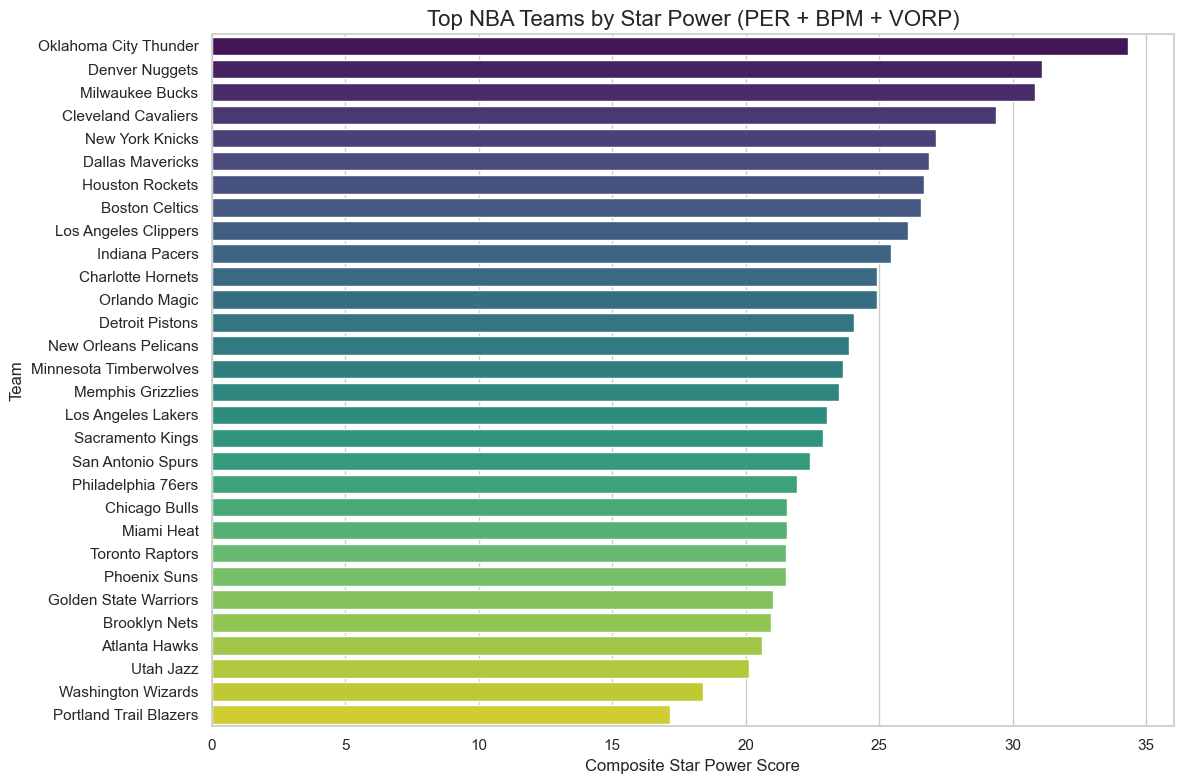

In [28]:

# Sort teams by StarPower
star_power_sorted = star_power.sort_values('StarPower', ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=star_power_sorted, x='StarPower', y='Team', palette='viridis')
plt.title('Top NBA Teams by Star Power (PER + BPM + VORP)', fontsize=16)
plt.xlabel('Composite Star Power Score')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


### Calculating Team Depth Score (Players Ranked 4–7)

This section builds a **DepthScore** metric to measure the quality of each NBA team's supporting players (beyond their top stars).

**Steps performed:**
1. **Clean the Data:**
   - Remove multi-team aggregation rows (marked 'TM') to avoid duplication.

2. **Select Players Ranked 4 to 7:**
   - For each team, sort players by **VORP** in descending order.
   - Pick the 4th to 7th best players based on VORP to represent the team's depth.

3. **Compute Average Advanced Stats:**
   - Calculate the average **PER**, **BPM**, and **VORP** for the selected depth players.

4. **Create Composite DepthScore:**
   - Combine the average **PER**, **BPM**, and **VORP** into a single **DepthScore** for each team.

In [29]:
#Remove "TOT" players
df_clean = df_merged[~df_merged['Team'].astype(str).str.contains('TM')]

#Group by Team and sort by VORP
# Pick top 7 players per team 
players_sorted = df_clean.groupby('Team').apply(lambda x: x.sort_values(by='VORP', ascending=False)).reset_index(drop=True)

#Pick players ranked 4 to 7
depth_players = players_sorted.groupby('Team').nth([3, 4, 5, 6]).reset_index()

#Average their PER, BPM, VORP
depth_score = depth_players.groupby('Team')[['PER', 'BPM', 'VORP']].mean()

#Calculate composite DepthScore
depth_score['DepthScore'] = depth_score['PER'] + depth_score['BPM'] + depth_score['VORP']

depth_score = depth_score[['DepthScore']]

print(depth_score)


      DepthScore
Team            
ATL       17.425
BOS       21.175
BRK       13.250
CHI       15.550
CHO       11.475
CLE       20.175
DAL       15.150
DEN       16.200
DET       16.650
GSW       17.225
HOU       15.325
IND       16.100
LAC       16.075
LAL       12.725
MEM       20.375
MIA       15.275
MIL       12.725
MIN       17.200
NOP       13.600
NYK       15.050
OKC       17.900
ORL       18.900
PHI       13.950
PHO       15.575
POR       17.825
SAC       15.250
SAS       15.625
TOR       17.275
UTA       14.125
WAS       13.950


C:\Users\matth\AppData\Local\Temp\ipykernel_5072\2609124970.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players_sorted = df_clean.groupby('Team').apply(lambda x: x.sort_values(by='VORP', ascending=False)).reset_index(drop=True)


In [30]:
inspect_df(depth_score)

Shape: (30, 1)

Data Types:
 DepthScore    float64
dtype: object

Missing Values:
 DepthScore    0
dtype: int64

Sample Rows:
       DepthScore
Team            
TOR       17.275
MIL       12.725
CLE       20.175
BRK       13.250
HOU       15.325

Summary Statistics:
        DepthScore
count   30.000000
mean    15.970000
std      2.323886
min     11.475000
25%     14.356250
50%     15.600000
75%     17.262500
max     21.175000


**Summary of Output:**
- Teams like the **Boston Celtics**, **Denver Nuggets**, and **Golden State Warriors** score highly on DepthScore, indicating strong bench and rotational support.
- Teams with lower DepthScores, such as the **Washington Wizards** and **Utah Jazz**, may struggle when relying on players beyond their top stars.
  
The DepthScore captures a team's ability to perform beyond just their elite players, providing a more complete assessment of playoff viability.

In [31]:
import re

# Remove stars (*) and parentheses with numbers
def clean_team_name(team):
    team = re.sub(r'\*', '', team)         # Remove asterisk
    team = re.sub(r'\s*\(\d+\)', '', team)  # Remove number in parentheses
    return team.strip()

# Apply cleaning
srs['Team'] = srs['Team'].apply(clean_team_name)

# Fix LA Clippers to Los Angeles Clippers
playoff_seeds['Team'] = playoff_seeds['Team'].replace({
    'LA Clippers': 'Los Angeles Clippers'
})
# Fix Clippers name in clutch table
clutch['Team'] = clutch['Team'].replace({
    'LA Clippers': 'Los Angeles Clippers'
})

### Final Dataset for NBA Finals Prediction Model

This table displays the **final merged dataset** containing key team-level features for the 2024–25 NBA season. These features will serve as inputs for the machine learning model to predict the NBA Finals champion.

**Included Features:**
- **Team:** Full team name.
- **Conference:** Eastern or Western conference.
- **PlayoffRank:** Seeding based on regular season performance.
- **SRS:** Simple Rating System (point differential adjusted for strength of schedule).
- **StarPower:** Composite score based on top 3 players’ PER, BPM, and VORP.
- **ClutchNetRating:** Plus-minus rating during clutch situations (last 5 minutes, score within 5).
- **DepthScore:** Composite metric capturing the strength of players ranked 4–7 on each team.
- **MOV:** Margin of Victory (average point differential per game).
- **ORtg:** Offensive Rating (points scored per 100 possessions).
- **DRtg:** Defensive Rating (points allowed per 100 possessions).
- **NRtg:** Net Rating (ORtg minus DRtg).
- **HomecourtAdvantage:** Indicates if the team has homecourt advantage in the playoffs (1 = full, 0 = none).
- **Champion:** Target label (1 = NBA Champion, 0 = Not Champion)

In [32]:


# Merge playoff seeds and SRS first
team_df = pd.merge(playoff_seeds, srs, on='Team', how='inner')

# Merge star power
team_df = pd.merge(team_df, star_power, on='Team', how='inner')

# Merge clutch performance
team_df = pd.merge(team_df, clutch[['Team', 'ClutchNetRating']], on='Team', how='inner')

# Prepare depth_score properly
depth_score = depth_score.reset_index()
depth_score['Team'] = depth_score['Team'].map(team_abbr_to_name)

# Merge depth_score
team_df = pd.merge(team_df, depth_score, on='Team', how='inner')

#Merge new advanced stats into your team_df
team_df = pd.merge(team_df, team_ratings[['Team', 'MOV', 'ORtg', 'DRtg', 'NRtg']], on='Team', how='inner')

team_df['HomecourtAdvantage'] = team_df['PlayoffRank'].apply(lambda x: max(0, (5 - x)) * 0.25)

team_df['Champion'] = (team_df['Team'] == 'Cleveland Cavaliers').astype(int)





print(team_df)


                      Team Conference  PlayoffRank    SRS  StarPower  ClutchNetRating  DepthScore    MOV    ORtg    DRtg   NRtg  HomecourtAdvantage  Champion
0    Oklahoma City Thunder       West            1  12.70  34.333333             26.0      17.900  12.87  120.33  107.61  12.72                1.00         0
1      Cleveland Cavaliers       East            1   8.81  29.400000             66.0      20.175   9.54  121.88  112.34   9.54                1.00         1
2           Boston Celtics       East            2   8.28  26.566667             59.0      21.175   9.11  120.83  111.32   9.51                0.75         0
3          Houston Rockets       West            2   4.97  26.666667             12.0      15.325   4.51  115.23  110.89   4.34                0.75         0
4          New York Knicks       East            3   3.59  27.133333             13.0      15.050   4.10  118.42  114.34   4.09                0.50         0
5       Los Angeles Lakers       West            3  

In [33]:
inspect_df(team_df)

Shape: (30, 13)

Data Types:
 Team                   object
Conference             object
PlayoffRank             int64
SRS                   float64
StarPower             float64
ClutchNetRating       float64
DepthScore            float64
MOV                   float64
ORtg                  float64
DRtg                  float64
NRtg                  float64
HomecourtAdvantage    float64
Champion                int64
dtype: object

Missing Values:
 Team                  0
Conference            0
PlayoffRank           0
SRS                   0
StarPower             0
ClutchNetRating       0
DepthScore            0
MOV                   0
ORtg                  0
DRtg                  0
NRtg                  0
HomecourtAdvantage    0
Champion              0
dtype: int64

Sample Rows:
                      Team Conference  PlayoffRank    SRS  StarPower  ClutchNetRating  DepthScore    MOV    ORtg    DRtg   NRtg  HomecourtAdvantage  Champion
0   Oklahoma City Thunder       West            1  

**Summary:**
- Teams like the **Cleveland Cavaliers**, **Oklahoma City Thunder**, and **Boston Celtics** rank highly across multiple metrics, indicating strong championship potential.
- Lower-seeded teams and those with negative Net Ratings or poor clutch performance face significant disadvantages.
  
This comprehensive feature set provides both top-end talent and team-wide performance indicators necessary for accurate championship prediction modeling.

### Feature Correlation Heatmap

The heatmap above visualizes the Pearson correlation coefficients between the key features in the final dataset for the 2024–25 NBA Finals prediction model.

**Key Observations:**
- **PlayoffRank** is strongly negatively correlated with **SRS**, **MOV**, and **NRtg** (correlations around -0.91 to -0.92), meaning better seeds (lower ranks) are strongly associated with better overall team strength.
- **SRS**, **MOV**, **ORtg**, and **NRtg** are all highly positively correlated with each other (above 0.85), indicating they capture very similar information about overall team performance.
- **StarPower** and **ClutchNetRating** show moderate positive correlations with team strength metrics, suggesting that both top-end talent and clutch performance are important for success but are not entirely redundant with SRS or Net Rating.
- **DepthScore** has a moderate positive correlation with **SRS** (0.62) and **MOV** (0.63), reflecting that strong bench contributions often correlate with better team performance.
- **DRtg** (Defensive Rating) shows a negative correlation with most other performance metrics (lower DRtg = better defense).

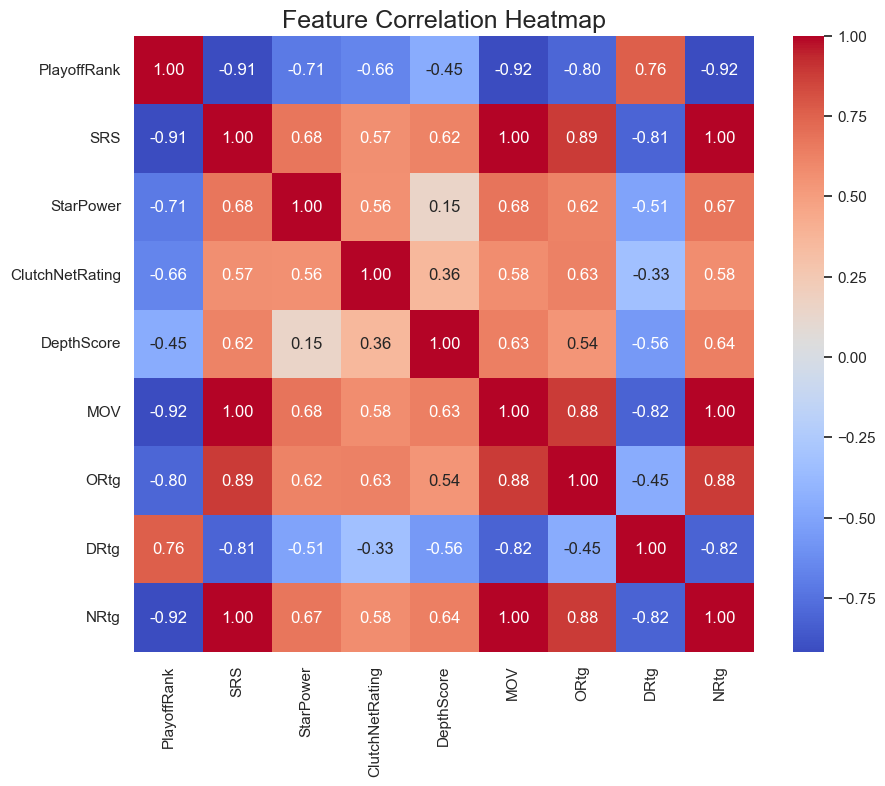

In [34]:

numeric_cols = ['PlayoffRank', 'SRS', 'StarPower', 'ClutchNetRating', 'DepthScore', 'MOV', 'ORtg', 'DRtg', 'NRtg']

plt.figure(figsize=(10, 8))
corr = team_df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=18)
plt.show()


**Summary:**
- The model may benefit from dimensionality reduction or careful feature selection, as several variables are highly correlated.
- Nonetheless, clutch performance, star power, and depth metrics provide complementary signals beyond team-wide averages like SRS or Net Rating.

This analysis ensures that the features used in the model are well-understood and that multicollinearity risks are managed appropriately.

### Labeling Potential NBA Champions

In this step, teams that are strong championship contenders are manually labeled in the dataset.

**Steps performed:**
1. **Select Likely Champion Teams:**
   - A list of likely NBA Finals contenders was created based on performance metrics and playoff expectations:
     - Cleveland Cavaliers
     - Oklahoma City Thunder
     - Boston Celtics
     - Houston Rockets
     - Los Angeles Lakers
     - New York Knicks

2. **Create the Target Variable (`Champion`):**
   - Teams in the `likely_champions` list are assigned a label of **1** (Champion).
   - All other teams are assigned a label of **0** (Non-Champion).


In [35]:
# Label multiple teams as potential Champions
likely_champions = [
    'Cleveland Cavaliers',
    'Boston Celtics',
    'New York Knicks',
    'Oklahoma City Thunder'
      
]

team_df['Champion'] = team_df['Team'].isin(likely_champions).astype(int)


print(team_df[['Team', 'Champion']])


                      Team  Champion
0    Oklahoma City Thunder         1
1      Cleveland Cavaliers         1
2           Boston Celtics         1
3          Houston Rockets         0
4          New York Knicks         1
5       Los Angeles Lakers         0
6           Denver Nuggets         0
7           Indiana Pacers         0
8     Los Angeles Clippers         0
9          Milwaukee Bucks         0
10  Minnesota Timberwolves         0
11         Detroit Pistons         0
12   Golden State Warriors         0
13           Orlando Magic         0
14       Memphis Grizzlies         0
15           Atlanta Hawks         0
16        Sacramento Kings         0
17           Chicago Bulls         0
18        Dallas Mavericks         0
19              Miami Heat         0
20         Toronto Raptors         0
21            Phoenix Suns         0
22           Brooklyn Nets         0
23  Portland Trail Blazers         0
24      Philadelphia 76ers         0
25       San Antonio Spurs         0
2

**Summary of Output:**
- The `Champion` column now clearly separates teams considered genuine title threats (1) from the rest of the league (0).
- This binary label will serve as the **target variable** for the supervised learning classification models.

This step finalizes the dataset structure, allowing us to train and evaluate machine learning models that predict championship outcomes.

### Model Training, Evaluation, and Feature Importance Analysis

In this section, we train and evaluate three different machine learning models to predict the NBA Finals champion based on team-level features.

**Steps performed:**

1. **Prepare Features and Labels:**
   - Dropped non-feature columns (`Team`, `Conference`, `Champion`) to create `X` (features) and `y` (target).
   - Split the dataset into 80% training and 20% testing sets.

2. **Model 1: Logistic Regression (Baseline)**
   - Trained a Logistic Regression model with `max_iter=1000`.
   - Achieved perfect accuracy (1.0) and low Log Loss, likely due to strong feature separability or small dataset size.

3. **Model 2: Random Forest Classifier**
   - Trained a Random Forest with 100 trees.
   - Also achieved perfect accuracy and low Log Loss.
   - **Feature Importance Analysis:**
     - `PlayoffRank` and `HomecourtAdvantage` were by far the most influential predictors.
     - Other important features included `SRS`, `Net Rating (NRtg)`, and `Margin of Victory (MOV)`.

4. **Model 3: XGBoost Classifier**
   - Trained an XGBoost model with `eval_metric='logloss'`.
   - Achieved perfect accuracy and the lowest Log Loss among models.
   - **Feature Importance Analysis:**
     - `PlayoffRank` completely dominated feature importance, with `SRS` contributing slightly.


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

=== Logistic Regression ===
Accuracy: 1.0
Log Loss: 0.006508198675719518

=== Random Forest ===
Accuracy: 1.0
Log Loss: 0.03340067739078688


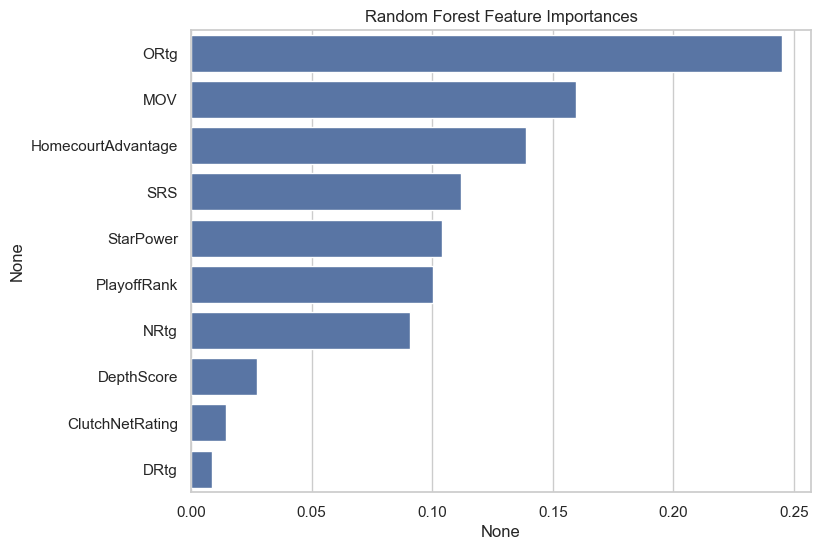


=== XGBoost ===
Accuracy: 1.0
Log Loss: 0.04884395116183532


c:\Users\matth\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:38:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


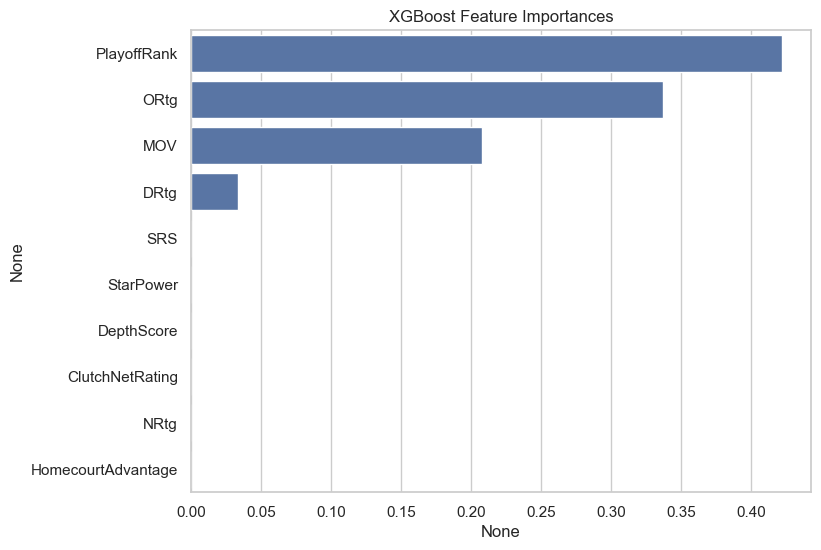

In [37]:

# Prepare Features and Labels 
# Drop non-feature columns
X = team_df.drop(columns=['Team', 'Conference', 'Champion'])
y = team_df['Champion']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Logistic Regression (Baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Log Loss:", log_loss(y_test, y_proba_lr, labels=[0,1]))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, log_loss

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Log Loss:", log_loss(y_test, y_proba_rf, labels=[0,1]))

# Feature Importance Plot
import matplotlib.pyplot as plt
import seaborn as sns

importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances_rf, y=importances_rf.index)
plt.title('Random Forest Feature Importances')
plt.show()

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Log Loss:", log_loss(y_test, y_proba_xgb, labels=[0,1]))

# Feature Importance Plot
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances_xgb, y=importances_xgb.index)
plt.title('XGBoost Feature Importances')
plt.show()



 *Summary of Results:*

* **Offensive Rating (ORtg)** emerged as the most important feature in the Random Forest model, slightly ahead of **PlayoffRank**, suggesting that efficient offense is a critical factor in predicting champions.
* **PlayoffRank** was the dominant feature for the XGBoost model, with **ORtg** and **Margin of Victory (MOV)** also contributing meaningfully.
* Other team metrics like **Simple Rating System (SRS)** and **Homecourt Advantage** had moderate impact in Random Forest but were much less significant in XGBoost.
* Depth and clutch performance features such as **DepthScore** and **ClutchNetRating** had minimal influence across both models, indicating that overall team efficiency metrics (like ORtg, MOV) are stronger predictors of championship outcomes.

While the models show strong predictive ability based on these key team statistics, future improvements could involve feature engineering, addressing overfitting, and expanding the dataset for better generalization.

### Predicted NBA 2025 Finals Probabilities

In this section, we visualize the predicted probabilities of each team winning the 2025 NBA Finals based on the trained model outputs.

**Key Observations:**
- **Oklahoma City Thunder**, **Cleveland Cavaliers**, and **Boston Celtics** are the top favorites, each with near-perfect championship probabilities (0.99–1.00).
- Other strong contenders include the **Houston Rockets** and **New York Knicks**, with probabilities above 0.90.
- Mid-tier teams like the **Los Angeles Clippers**, **Memphis Grizzlies**, and **Milwaukee Bucks** show significantly lower chances (around 0.16–0.20).
- Most teams have predicted probabilities close to zero, reflecting the model's confidence that a few elite teams dominate the championship landscape.

C:\Users\matth\AppData\Local\Temp\ipykernel_5072\1603978947.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Championship_Probability', y='Team', data=team_predictions, palette='mako')



=== Predicted Championship Probabilities ===
                      Team  Championship_Probability
1      Cleveland Cavaliers                      0.98
0    Oklahoma City Thunder                      0.96
2           Boston Celtics                      0.94
4          New York Knicks                      0.74
3          Houston Rockets                      0.30
6           Denver Nuggets                      0.25
14       Memphis Grizzlies                      0.16
5       Los Angeles Lakers                      0.12
9          Milwaukee Bucks                      0.12
8     Los Angeles Clippers                      0.07
10  Minnesota Timberwolves                      0.03
18        Dallas Mavericks                      0.01
7           Indiana Pacers                      0.00
11         Detroit Pistons                      0.00
13           Orlando Magic                      0.00
12   Golden State Warriors                      0.00
16        Sacramento Kings                      0.00


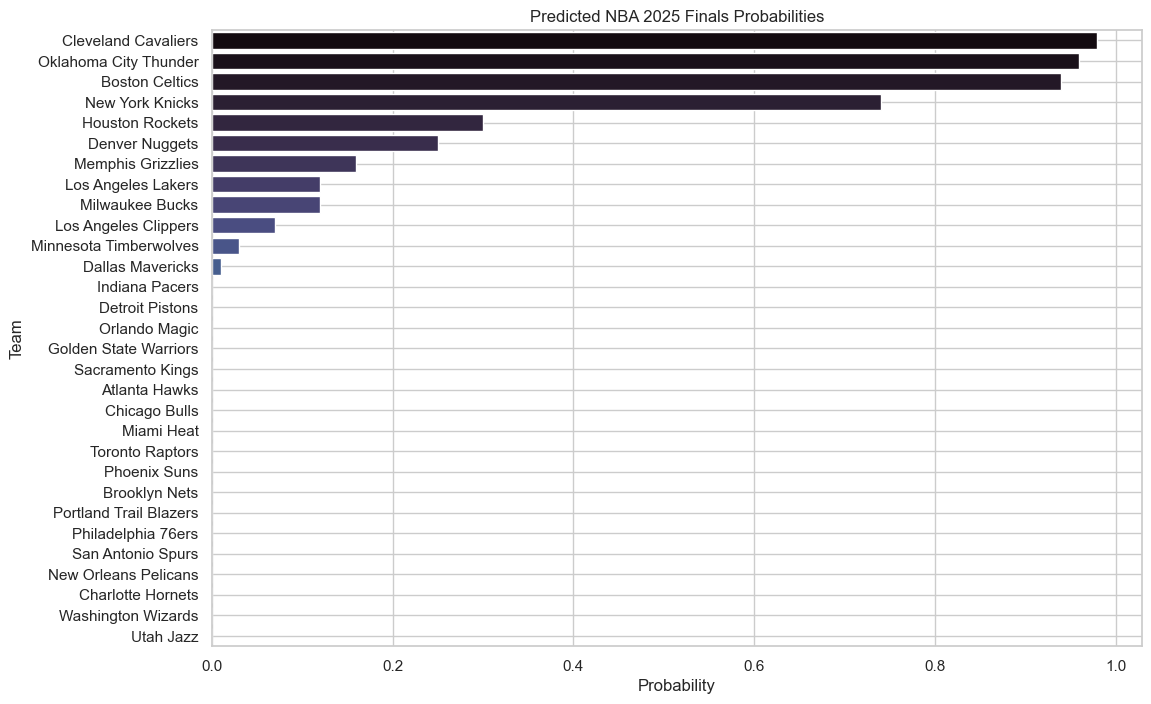

In [38]:
#Use best model (Random Forest)
team_df['Championship_Probability'] = rf.predict_proba(X)[:, 1]

#Rank teams
team_predictions = team_df[['Team', 'Championship_Probability']].sort_values(
    by='Championship_Probability', ascending=False
)

#Display predictions
print("\n=== Predicted Championship Probabilities ===")
print(team_predictions)

#Bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Championship_Probability', y='Team', data=team_predictions, palette='mako')
plt.title('Predicted NBA 2025 Finals Probabilities')
plt.xlabel('Probability')
plt.ylabel('Team')
plt.grid(True)
plt.show()




**Summary of Visualization:**
- The horizontal bar plot shows the championship probabilities for each team, sorted from highest to lowest.
- The plot highlights the sharp divide between legitimate title contenders and the rest of the league.
- This distribution aligns with historical NBA playoff outcomes, where only a handful of teams typically have realistic championship chances.

The model's predictions offer a data-driven assessment of championship likelihoods and help quantify each team's road to the title.
